# Age Rating Prediction From Game Reviews
by [CSpanias](https://cspanias.github.io/aboutme/), 1st Week's Project for [Solving Business Problems with NLP](https://omdena.com/course/solving-business-problems-with-nlp/) by Omdena

# CONTENT
1. [Webscraping Data](#webscraping)
2. [Import Data](#importdata)
4. [Data Wrangling](#datawrangling)
5. NLP PipeLine

<a name="webscraping"></a>
# 1. Webscraping Data

The data were scraped using __[ParseHub](https://www.parsehub.com/)__, a free & simple tool for web scraping. You can see the step-by-step commands on the GIF image below.

In [1]:
# import required libraries
import pandas as pd # import dataset, create and manipulate dataframes
import numpy as np # vectorize functions and perform calculations
import contractions # expand contractions
import re # regular expressions
import string # count-based features
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

from nltk.tokenize import word_tokenize # tokenize string or sentences
from nltk.corpus import stopwords # import english stopword list
from nltk.stem import PorterStemmer # stemming
from sklearn.linear_model import LogisticRegression # our algorithm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # count-based language models
from sklearn.metrics import confusion_matrix, classification_report, make_scorer # model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score # model evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV # split & evaluate dataset, hyperparameter optimization
from sklearn.model_selection import KFold # cross-validation
from collections import Counter # count-based calculations
from textblob import TextBlob # sentiment analysis
from wordcloud import WordCloud # visualization

pd.options.mode.chained_assignment = None  # hide warnings

In [2]:
# import dataset
df = pd.read_csv('game_data.csv')

<a name="datawrangling"></a>
# 2. Data Wrangling

In [3]:
# inspect first 5 rows
df.head()

,game_title_name,game_title_game_age,game_title_kid_review_name,game_title_parent_review_name
0,God of War (2018),age 17+,While God of War used to be an ultra-violent a...,NaN
1,God of War (2018),age 17+,"Gone are the days of Kratos over the top, cart...",NaN
2,God of War (2018),age 17+,NOT AS BAD AS PREVIOUS GOD OF WARS. The violen...,NaN
3,God of War (2018),age 17+,Very good story and gameplay,NaN
4,God of War (2018),age 17+,God of War takes a huge risk by completely res...,NaN


In [4]:
# check column names
print(df.columns)

# rename columns
df.rename(columns={
    'game_title_name': 'title',
    'game_title_game_age': 'age',
    'game_title_kid_review_name': 'review_kid',
    'game_title_parent_review_name': 'review_parent'
}, inplace=True)

# check first 5 rows
df.head()

Index(['game_title_name', 'game_title_game_age', 'game_title_kid_review_name',
       'game_title_parent_review_name'],
      dtype='object')


,title,age,review_kid,review_parent
0,God of War (2018),age 17+,While God of War used to be an ultra-violent a...,NaN
1,God of War (2018),age 17+,"Gone are the days of Kratos over the top, cart...",NaN
2,God of War (2018),age 17+,NOT AS BAD AS PREVIOUS GOD OF WARS. The violen...,NaN
3,God of War (2018),age 17+,Very good story and gameplay,NaN
4,God of War (2018),age 17+,God of War takes a huge risk by completely res...,NaN


In [5]:
# check basic stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          306 non-null    object
 1   age            306 non-null    object
 2   review_kid     304 non-null    object
 3   review_parent  304 non-null    object
dtypes: object(4)
memory usage: 19.2+ KB


In [6]:
# replace NaN values
df.replace(np.nan,'',regex=True, inplace=True)
df.head()

,title,age,review_kid,review_parent
0,God of War (2018),age 17+,While God of War used to be an ultra-violent a...,
1,God of War (2018),age 17+,"Gone are the days of Kratos over the top, cart...",
2,God of War (2018),age 17+,NOT AS BAD AS PREVIOUS GOD OF WARS. The violen...,
3,God of War (2018),age 17+,Very good story and gameplay,
4,God of War (2018),age 17+,God of War takes a huge risk by completely res...,


In [7]:
# make every review lower-case
df['review_kid'] = df['review_kid'].apply(str.lower)
df['review_parent'] = df['review_parent'].apply(str.lower)

# check first 5 rows
df.head()

,title,age,review_kid,review_parent
0,God of War (2018),age 17+,while god of war used to be an ultra-violent a...,
1,God of War (2018),age 17+,"gone are the days of kratos over the top, cart...",
2,God of War (2018),age 17+,not as bad as previous god of wars. the violen...,
3,God of War (2018),age 17+,very good story and gameplay,
4,God of War (2018),age 17+,god of war takes a huge risk by completely res...,


In [8]:
# check for duplicates
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of duplicated rows: 2.


In [9]:
# drop duplicated rows
df.drop_duplicates(keep='first', inplace=True)

# check duplicates
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of duplicated rows: 0.


In [10]:
# clean age column
df.age = df.age.str.replace(pat=r'[^\d{,2}]', repl='', regex=True)

#check 1st 5 rows
df.head()

,title,age,review_kid,review_parent
0,God of War (2018),17,while god of war used to be an ultra-violent a...,
1,God of War (2018),17,"gone are the days of kratos over the top, cart...",
2,God of War (2018),17,not as bad as previous god of wars. the violen...,
3,God of War (2018),17,very good story and gameplay,
4,God of War (2018),17,god of war takes a huge risk by completely res...,


In [11]:
# convert age column to int
df.age = pd.to_numeric(df.age)

# check dtype of age
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 609
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          608 non-null    object 
 1   age            305 non-null    float64
 2   review_kid     608 non-null    object 
 3   review_parent  608 non-null    object 
dtypes: float64(1), object(3)
memory usage: 23.8+ KB


In [12]:
# create category of interest, 1 = safe, 0 = non-safe
df['safe'] = df.apply(lambda row: 1 if row['age'] < 17  else 0, axis=1)

# check 1st five rows
df.head()

,title,age,review_kid,review_parent,safe
0,God of War (2018),17.0,while god of war used to be an ultra-violent a...,,0
1,God of War (2018),17.0,"gone are the days of kratos over the top, cart...",,0
2,God of War (2018),17.0,not as bad as previous god of wars. the violen...,,0
3,God of War (2018),17.0,very good story and gameplay,,0
4,God of War (2018),17.0,god of war takes a huge risk by completely res...,,0


In [13]:
# check values
df.safe.value_counts()

0    456
1    152
Name: safe, dtype: int64

In [14]:
# merge reviews into 1 column
df['reviews'] = df.review_kid + df.review_parent

# discard unecessary columns
df.drop(columns=['review_kid', 'review_parent'], inplace=True)

# check 1st five rows
df.head()

,title,age,safe,reviews
0,God of War (2018),17.0,0,while god of war used to be an ultra-violent a...
1,God of War (2018),17.0,0,"gone are the days of kratos over the top, cart..."
2,God of War (2018),17.0,0,not as bad as previous god of wars. the violen...
3,God of War (2018),17.0,0,very good story and gameplay
4,God of War (2018),17.0,0,god of war takes a huge risk by completely res...


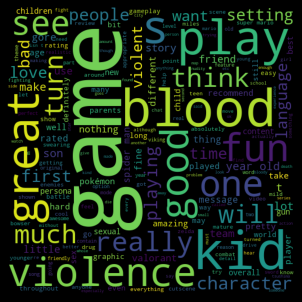

In [15]:
# generate a wordcloud for safe titles
safe_wordcloud = WordCloud(width=512, height=512).generate(' '.join(df['reviews'][df['safe']==1]))
plt.figure(figsize=(6, 4), facecolor='k')
plt.imshow(safe_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

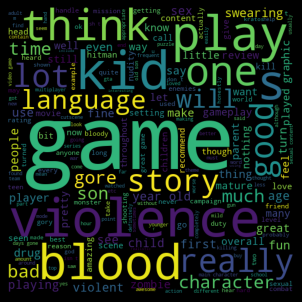

In [16]:
# generate a wordcloud for non-safe titles
non_safe_wordcloud = WordCloud(width=512, height=512).generate(' '.join(df['reviews'][df['safe']==0]))
plt.figure(figsize=(6, 4), facecolor='k')
plt.imshow(non_safe_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
# load stopwords default nltk list
stop_words = stopwords.words('english')

def normalize_document(doc):
    """Normalize the document by performing basic text pre-processing tasks."""

    # remove special characters
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    # remove trailing whitespace
    nowhite = doc.strip()
    # expand contractions
    expanded = contractions.fix(nowhite)
    # tokenize document
    tokens = word_tokenize(expanded)
    # remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

# vectorize function for faster computations
normalize_corpus = np.vectorize(normalize_document)

In [18]:
# normalize 'description column'
norm_corpus = normalize_corpus(list(df['reviews']))

In [21]:
# check shape
print("The 'review' column has {} rows.\n".format(df.reviews.shape[0]))

# check first 5 rows
print("The first 5 reviews are:\n\n{}".format(df.reviews.head()))

The 'review' column has 608 rows.

The first 5 reviews are:

0    while god of war used to be an ultra-violent a...
1    gone are the days of kratos over the top, cart...
2    not as bad as previous god of wars. the violen...
3                         very good story and gameplay
4    god of war takes a huge risk by completely res...
Name: reviews, dtype: object


In [22]:
# assign feature & target variables
X = df.drop(['safe'], axis = 1)
y = df['safe']

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check shape of train & test sets
print("The training set has {} rows and the testing set has {} rows.\n".format(X_train.shape[0], X_test.shape[0]))

# check label's distribution for each set
print("The label distribution is:\n\nTraining set: Label 1 = {} | Label 0 = {}.\n\nTest set: Label 1 = {} | Label 0 = {}\n".
      format(Counter(y_train)[1], Counter(y_train)[0], Counter(y_test)[1], Counter(y_test)[0]))

The training set has 486 rows and the testing set has 122 rows.

The label distribution is:

Training set: Label 1 = 131 | Label 0 = 355.

Test set: Label 1 = 21 | Label 0 = 101



A number of basic text based features can also be created which sometimes are helpful for **improving text classification models**. 

Some examples are:

- __Word Count:__ total number of words in the documents
- __Character Count:__ total number of characters in the documents
- __Average Word Density:__ average length of the words used in the documents
- __Puncutation Count:__ total number of punctuation marks in the documents
- __Upper Case Count:__ total number of upper count words in the documents
- __Title Word Count:__ total number of proper case (title) words in the documents

**Note**: The aforementioned information comes from [this](https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/) article.

Since we chose to __lower-case our reviews__ during the text preprocessing step, we won't need the __upper-case__ & __title-case__ word count features.

In [25]:
# calculate total number of characters
X_train['char_count'] = X_train['reviews'].apply(len)
# calculate total number of words
X_train['word_count'] = X_train['reviews'].apply(lambda x: len(x.split()))
# # calculate average word density
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
# calculate total number of punctuaction marks
X_train['punctuation_count'] = X_train['reviews'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))


# calculate total number of characters
X_test['char_count'] = X_test['reviews'].apply(len)
# calculate total number of words
X_test['word_count'] = X_test['reviews'].apply(lambda x: len(x.split()))
# calculate average word density
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
# calculate total number of punctuaction marks
X_test['punctuation_count'] = X_test['reviews'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 

In [26]:
# check df
X_train.head()

,title,age,reviews,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
438,Mafia: Definitive Edition,18.0,it's too violent,16,3,4.000000,1,0,0
133,Ghost of Tsushima: Director's Cut,16.0,"m: intense violence, bloody images and language",47,7,5.875000,2,0,0
492,,NaN,it is a very fun and good game and it is worth...,60,15,3.750000,0,0,0
150,,NaN,"its awsome. its bloody but it's ok, you fight ...",122,23,5.083333,7,0,0
9,God of War (2018),17.0,"(minor spoilers) this is a fantastic game, and...",771,132,5.796992,52,0,0


In [27]:
# calculate review's sentiment 
x_train_snt_obj = X_train['reviews'].apply(lambda row: TextBlob(row).sentiment)
# create a column for polarity scores
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
# create a column for subjectivity scores
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

# calculate review's sentiment 
x_test_snt_obj = X_test['reviews'].apply(lambda row: TextBlob(row).sentiment)
# create a column for polarity scores
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
# create a column for subjectivity scores
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [28]:
# check df
X_train.head()

,title,age,reviews,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
438,Mafia: Definitive Edition,18.0,it's too violent,16,3,4.000000,1,0,0,-0.800000,1.00
133,Ghost of Tsushima: Director's Cut,16.0,"m: intense violence, bloody images and language",47,7,5.875000,2,0,0,-0.300000,0.95
492,,NaN,it is a very fun and good game and it is worth...,60,15,3.750000,0,0,0,0.247500,0.34
150,,NaN,"its awsome. its bloody but it's ok, you fight ...",122,23,5.083333,7,0,0,-0.150000,0.70
9,God of War (2018),17.0,"(minor spoilers) this is a fantastic game, and...",771,132,5.796992,52,0,0,0.041667,0.46
